# **SALES PREDICTION 📈**

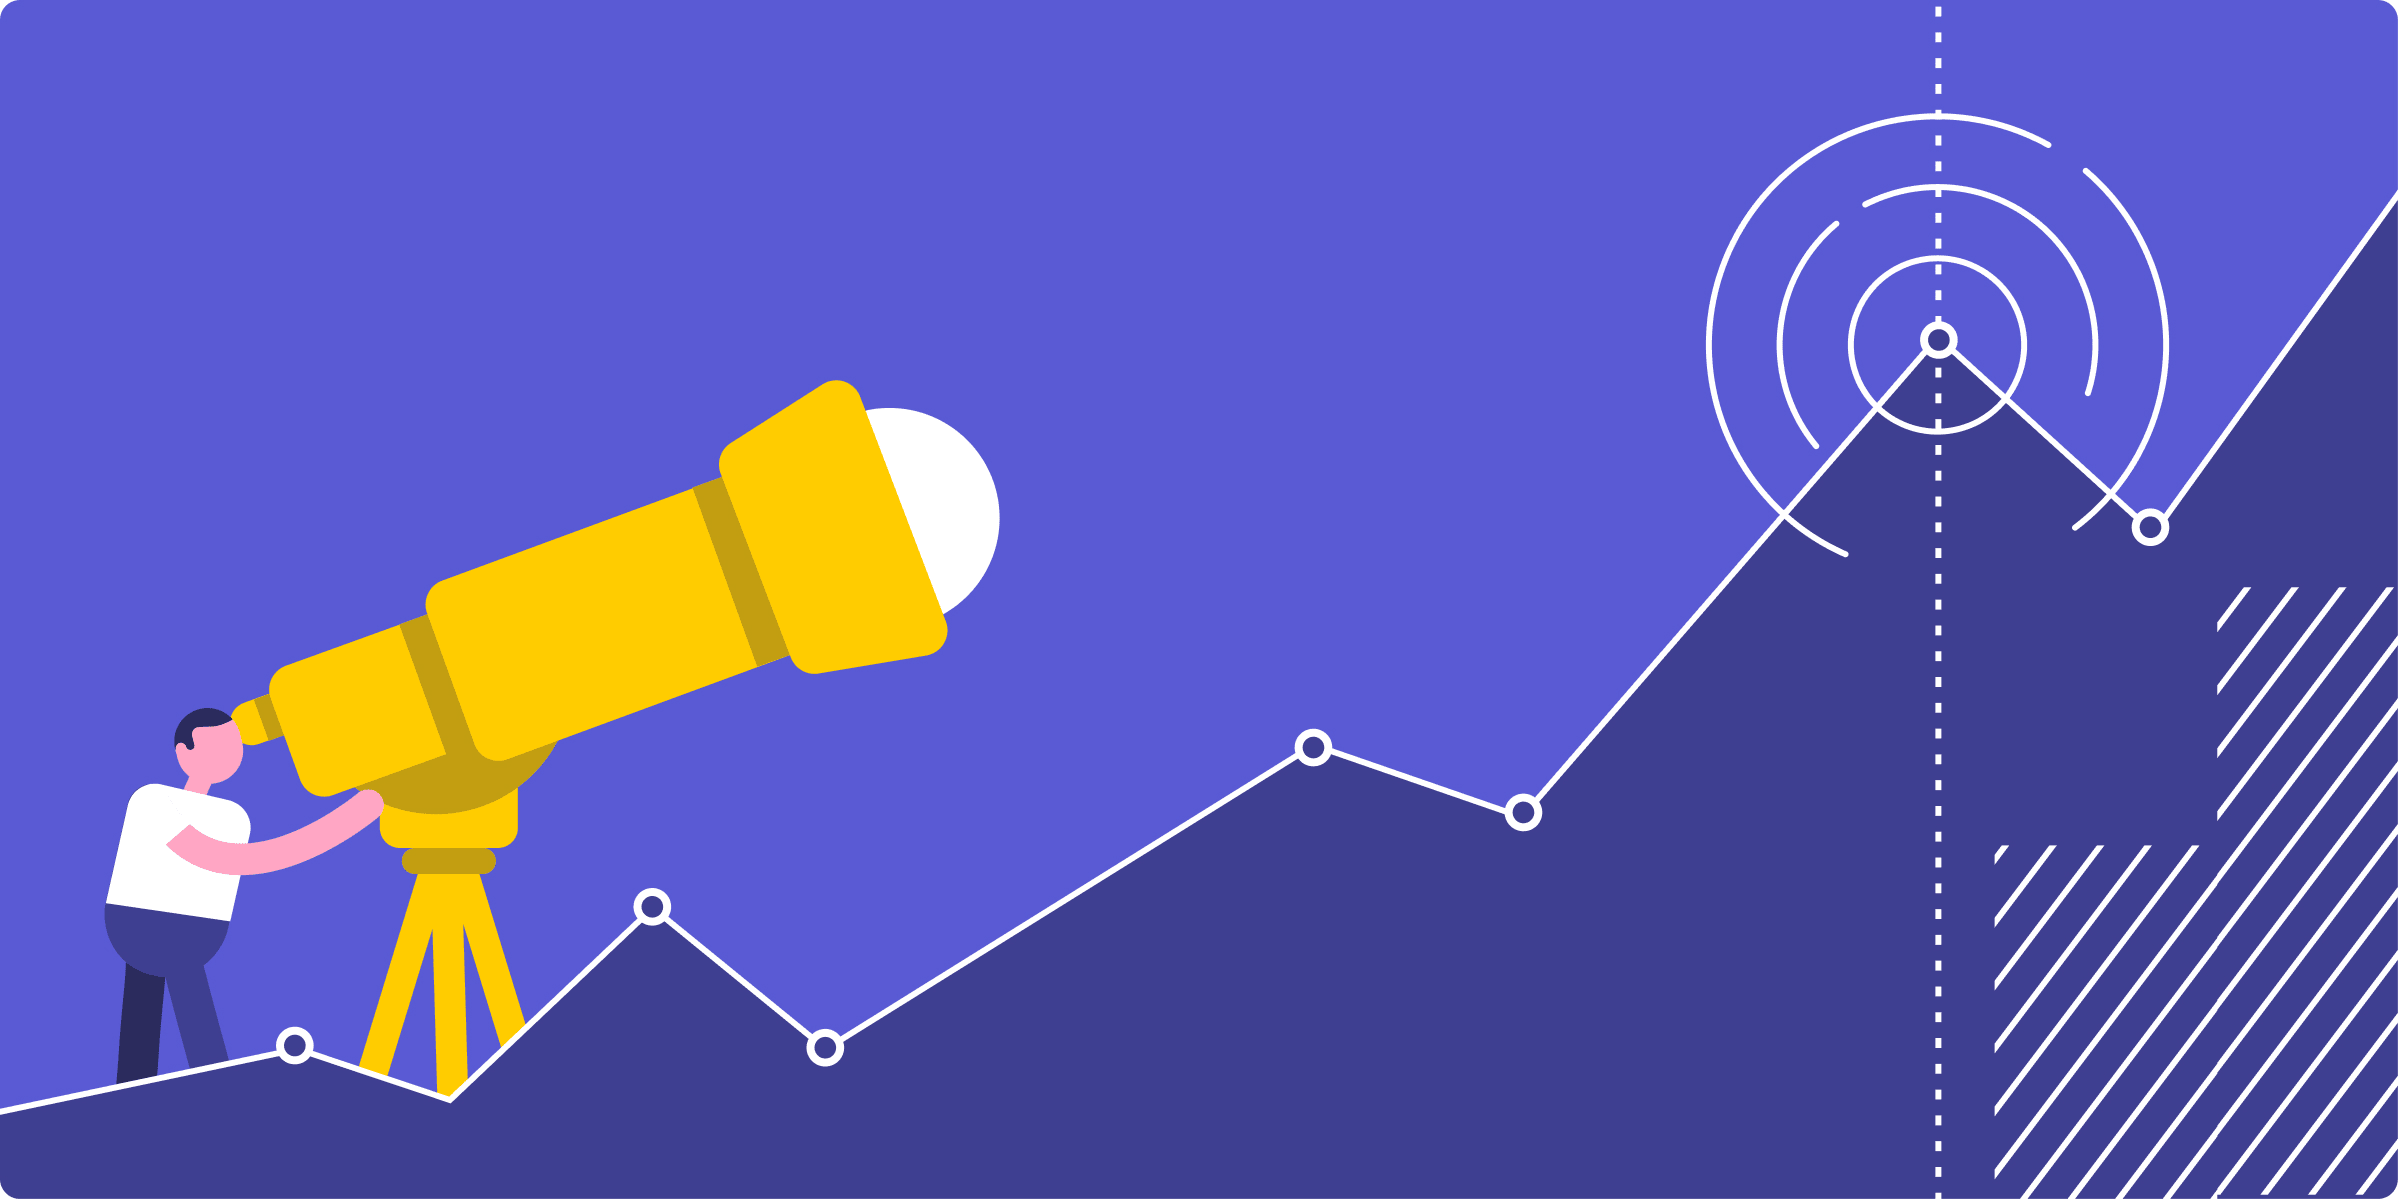

## Data Exploration


In [226]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
# Loading the dataset
df = pd.read_csv("sales.csv")

In [228]:
# Shape of the dataset
df.shape

(200, 5)

In [229]:
# Describing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [230]:
# Displaying first few rows of the dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [231]:
# Columns present in dataset now
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [232]:
# Checking number of missing values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [233]:
# Dropping the column 'Unnamed: 0'
df = df.drop(columns="Unnamed: 0", axis=1)

In [234]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Data Visualization

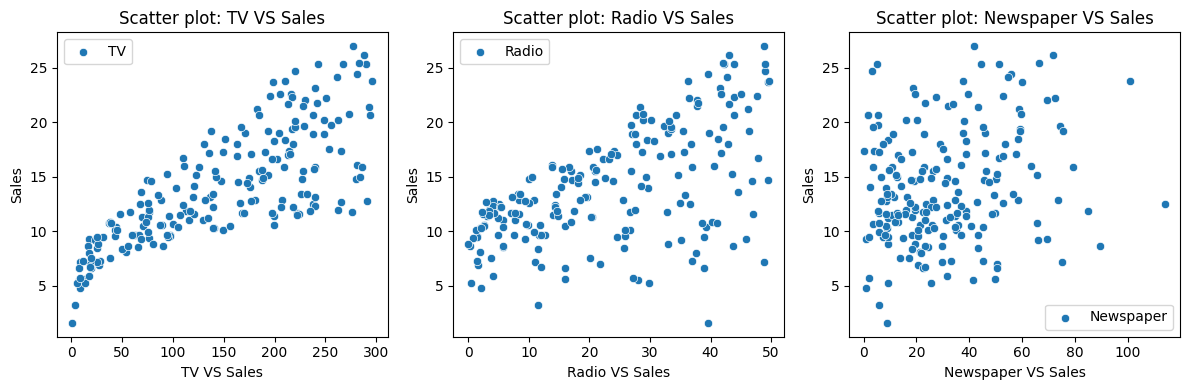

In [235]:
# Scatter plot
plt.figure(figsize=(12, 4))
columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=df[col_name],y=df["Sales"], label= col_name)
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

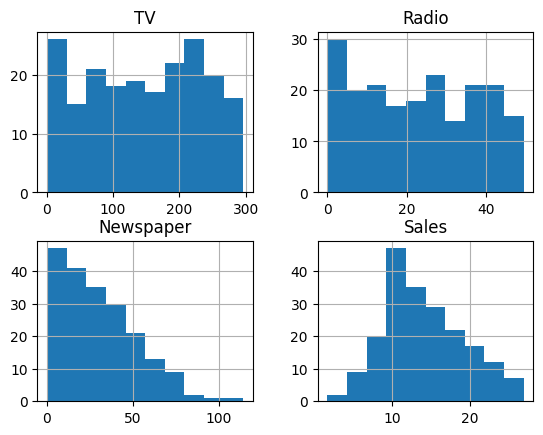

In [236]:
# Histograms to check the normality assumption of the dependent variable (Sales)
plt.figure(figsize=(10,6))
df.hist()
plt.show()

<ipython-input-237-defbbfc48e51>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col_name],hist=False, label= col_name)
<ipython-input-237-defbbfc48e51>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["Sales"],hist = False,label= "Sales")
<ipython-input-237-defbbfc4

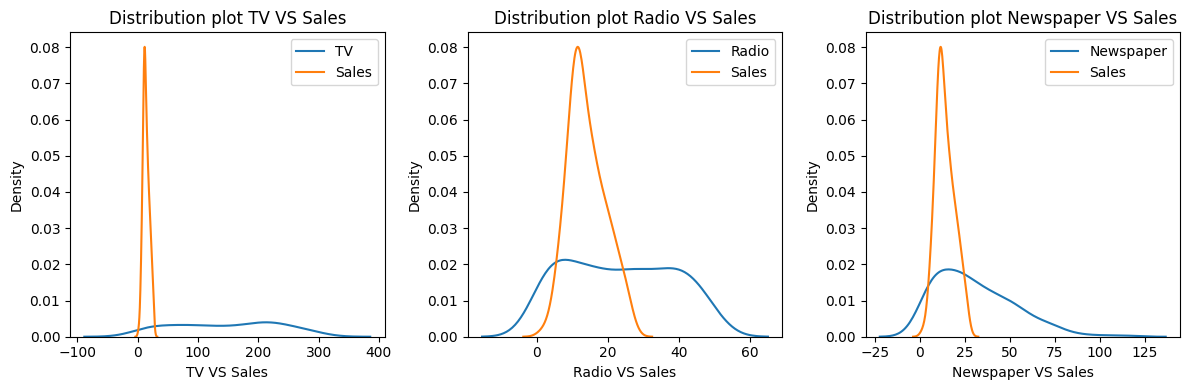

In [237]:
# Distribution plot comparing the distribution of each advertising channel ("TV", "Radio", "Newspaper") with the distribution of "Sales"

plt.figure(figsize=(12, 4))
columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

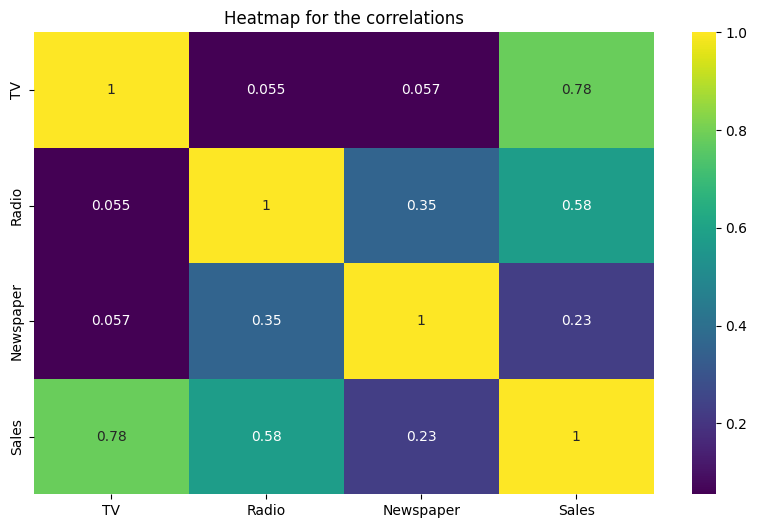

In [238]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Heatmap for the correlations")
plt.show()

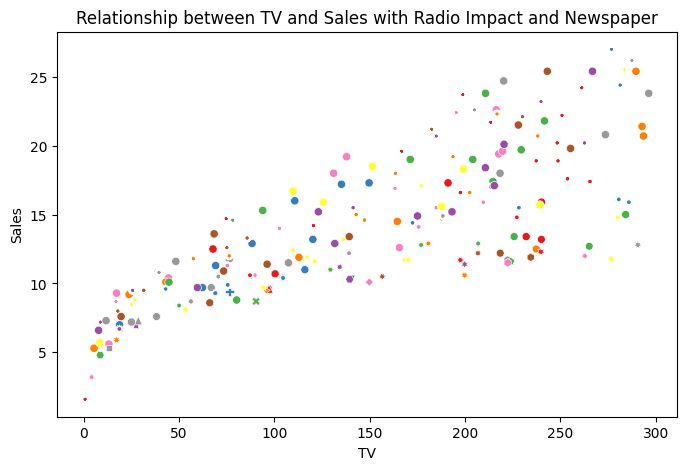

In [239]:
# Scatter plot to show how the spending on TV, the impact of Radio advertising, and the contribution of Newspaper advertising relate to sales.
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x="TV",y="Sales",style="Radio",hue="Newspaper",palette="Set1",legend=False)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales with Radio Impact and Newspaper")
plt.show()

## Model Preparation

In [240]:
# Splitting the data into train and test sets
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [241]:
# Scaling the dataset
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [242]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [243]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
        ]

Linear Regression
Mean Squared Error: 3.174097353976107
R2 Score: 0.8994380241009119
Cross-Validation R2: 0.8594884313276511


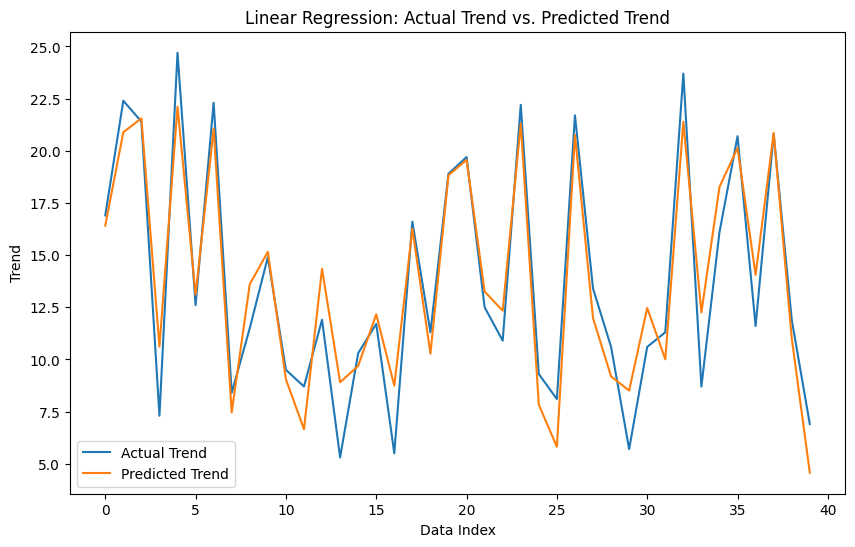


Ridge Regression
Mean Squared Error: 3.500676810829306
R2 Score: 0.8890913107500851
Cross-Validation R2: 0.8546283131951761


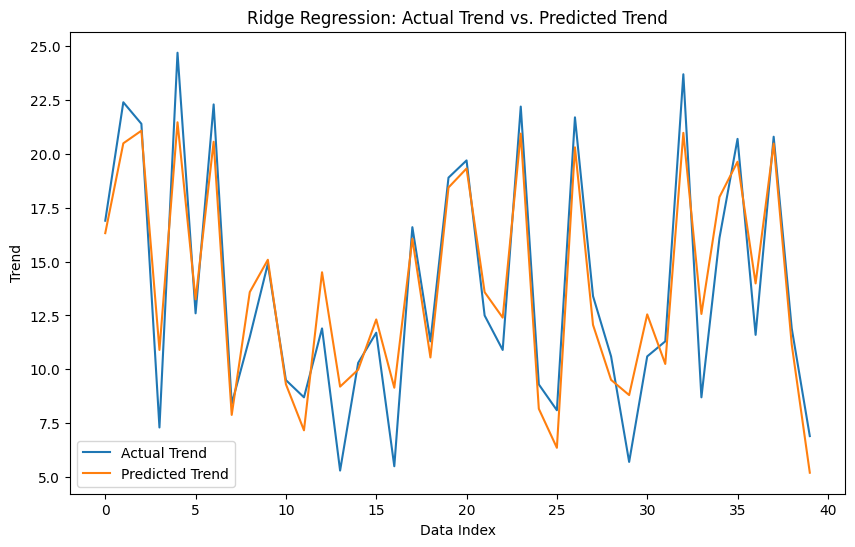


Lasso Regression
Mean Squared Error: 27.833508953208344
R2 Score: 0.11817680921684193
Cross-Validation R2: -0.07480543323377124


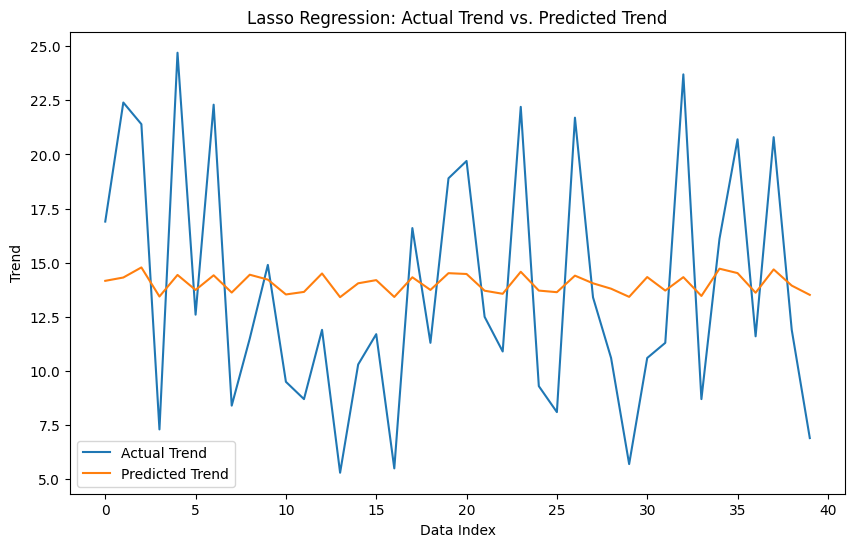

In [244]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))

    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()

## Model Evaluation

In the case of **LINEAR REGRESSION**, lower MSE value indicateS that the model is **making relatively accurate predictions.**
The high R² value (close to 1) suggests that the model is **explaining a significant portion of the variability in the Sales data**, indicating a **good fit.**

In [245]:
# Training the dataset on a Linear model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [246]:
y_pred = lr.predict(X_test_scaled)

In [247]:
# Sample new data with the same feature columns as the original dataset

tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    'TV': [tv],
    'Radio': [radio],
    'Newspaper': [news]
})

new_pred_scaled = scaler.transform(new_data)
print("------------------------------------------------")
new_pred = lr.predict(new_pred_scaled)
print("Predicted Sales : {}".format(abs(new_pred)))
print("------------------------------------------------")


Enter the TV value: 240
Enter the Radio value: 55
Enter the Newspaper value: 42
------------------------------------------------
Predicted Sales : [24.23584632]
------------------------------------------------


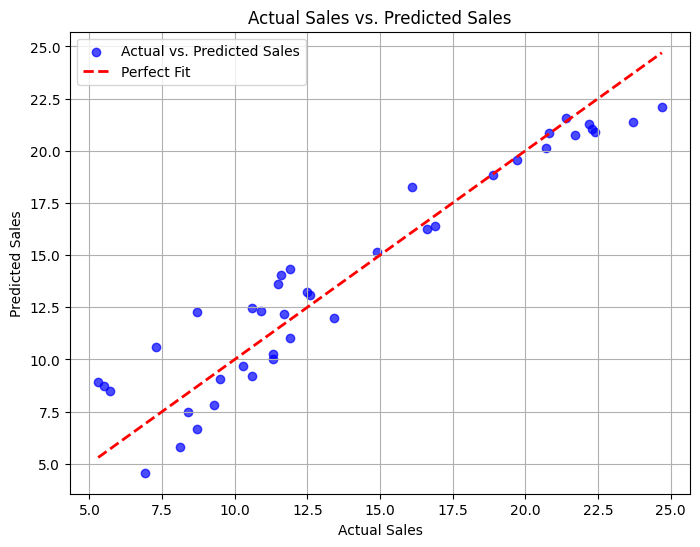

In [248]:
# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
